In [40]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import itertools
import os

In [41]:
def sample_to_list(data_type, sample_str):
    match data_type:
        case 'Rubtsov_samples':
            return [int(i) for i in sample_str]
        
        case 'Rubtsov_check':
            sample = [int(i) for i in sample_str]
            if len(sample) < modes_num:
                sample = [0 for _ in range(modes_num - len(sample))] + sample
            return sample
        
        case 'Mazanik':
            return [int(i) for i in sample_str.strip("][").split(',')]
        
        case 'Mazanik_block':
            return [int(i) for i in sample_str.strip("][").split(',')]
        
        case 'SF':
            return [int(i) for i in sample_str.strip("][").split(' ')]

def calc_fock_basis(ph_num, modes_num):
    basis = []
    slots_num = ph_num + modes_num
    all_comb_bars = list(itertools.combinations(range(1, slots_num), modes_num - 1))
    for bars in all_comb_bars:
        bars = list(bars)
        bars.append(slots_num)
        bars.insert(0, 0)
        basis_vec = []
        for i in range(modes_num):
            basis_vec.append(bars[i+1] - bars[i] - 1)
        basis.append(basis_vec)

    return basis

def data_base_prob(data, all_samples, base_type):
    match base_type:
        case 'Rubtsov_samples':
            with open(os.path.join('samples', base_data_file_name), 'r') as f_data:
                for f_sample in f_data:
                    f_sample = f_sample.strip()
                    sample, probability = f_sample.split('  ')
                    sample = sample_to_list(base_type, sample)
                
                    data[all_samples.index(sample)]['base_prob'] = round(float(probability), 6)
        
        case 'Rubtsov_check':
            with open(os.path.join('samples', base_data_file_name), 'r') as f_data:
                for f_sample in f_data:
                    f_sample = f_sample.strip()
                    sample = f_sample.split('  ')[0] 
                    probability = f_sample.split('  ')[2] 
                    sample = sample_to_list(base_type, sample)
                
                    data[all_samples.index(sample)]['base_prob'] = round(float(probability), 6)
        
        case 'Mazanik':
            with open(os.path.join('samples', base_data_file_name), 'r') as f_data:
                for f_sample in f_data:
                    f_sample = f_sample.strip()
                    sample, probability = f_sample.split('\t')
                    sample = sample_to_list(base_type, sample)
                
                    data[all_samples.index(sample)]['base_prob'] = round(float(probability), 6)
            
        case 'SF':
            with open(os.path.join('samples', base_data_file_name), 'r') as f_data:
                for f_sample in f_data:
                    f_sample = f_sample.strip()
                    sample, probability = f_sample.split('\t')
                    sample = sample_to_list(base_type, sample)
                
                    data[all_samples.index(sample)]['base_prob'] = round(float(probability), 6)
    
    return data
    
def data_subject_prob(data, all_samples, subject_type):
    match subject_type:
        case 'Mazanik_block':
            occurrences = [0 for _ in range(len(all_samples))]
            
            with open(os.path.join('samples', subject_data_file_name), 'r') as f_data:
                for f_sample in f_data:
                    f_sample = f_sample.strip()
                    sample = f_sample
                    sample = sample_to_list(subject_type, sample)
                    
                    occurrences[all_samples.index(sample)] += 1
            
            batch_size = sum(occurrences)
            subject_prob = [i / batch_size for i in occurrences]
            
            for i in range(len(all_samples)):
                data[i]['subject_prob'] = round(subject_prob[i], 6)
            
        case 'Rubtsov_samples':
            with open(os.path.join('samples', subject_data_file_name), 'r') as f_data:
                for f_sample in f_data:
                    f_sample = f_sample.strip()
                    sample, probability = f_sample.split('  ')
                    sample = sample_to_list(base_type, sample)
                
                    data[all_samples.index(sample)]['subject_prob'] = round(float(probability), 6)           
        
        case 'Rubtsov_check':
            print(subject_type)
        
        case 'Mazanik':
            occurrences = [0 for _ in range(len(all_samples))]
            
            with open(os.path.join('samples', subject_data_file_name), 'r') as f_data:
                for f_sample in f_data:
                    f_sample = f_sample.strip()
                    sample, probability = f_sample.split('\t')
                    sample = sample_to_list(subject_type, sample)
                    
                    occurrences[all_samples.index(sample)] += 1
            
            batch_size = sum(occurrences)
            subject_prob = [i / batch_size for i in occurrences]
            
            for i in range(len(all_samples)):
                data[i]['subject_prob'] = round(subject_prob[i], 6)
            
            
        case 'SF':
            print(subject_type)
    
    return data
    

def make_data_list(base_type, subject_type):
    all_samples = calc_fock_basis(photons_num, modes_num)
    
    data = [
        dict([
            ('sample', sample),
            ('base_prob', 0),
            ('subject_prob', 0)
        ]) for sample in all_samples
    ]
    
    
    data = data_base_prob(data, all_samples, base_type)
    data = data_subject_prob(data, all_samples, subject_type)
    
    return data

## Reading Boson Sampling data

### Setting data types to read
Set the type of data to be read according to the Sampler being used. 

Options: 'Rubtsov_samples', 'Rubtsov_check', 'Mazanik' or 'SF'

In [49]:
subject_type = 'Mazanik_block'
base_type = 'Mazanik'

subject_data_file_name = 'block_sample.txt'
base_data_file_name = 'sample.txt'

photons_num = 7
modes_num = 9

data_types = ['Rubtsov_samples', 'Rubtsov_check', 'Mazanik', 'SF', 'Mazanik_block']

if base_type in data_types and subject_type in data_types:
    print("comparison subject type:", subject_type)
    print("comparison base type:", base_type)
    print("photons number:", photons_num)
    print("modes number:", modes_num)
    print("different samples number:", int(scipy.special.binom(photons_num + modes_num - 1, photons_num)))
else:
    print("ERROR: this type of data does not exist")

comparison subject type: Mazanik_block
comparison base type: Mazanik
photons number: 7
modes number: 9
different samples number: 6435


In [50]:
data = make_data_list(base_type, subject_type)
print(data)

[{'sample': [0, 0, 0, 0, 0, 0, 0, 0, 7], 'base_prob': 0, 'subject_prob': 0.0}, {'sample': [0, 0, 0, 0, 0, 0, 0, 1, 6], 'base_prob': 0, 'subject_prob': 0.0}, {'sample': [0, 0, 0, 0, 0, 0, 0, 2, 5], 'base_prob': 0, 'subject_prob': 0.0}, {'sample': [0, 0, 0, 0, 0, 0, 0, 3, 4], 'base_prob': 0, 'subject_prob': 0.0}, {'sample': [0, 0, 0, 0, 0, 0, 0, 4, 3], 'base_prob': 0, 'subject_prob': 2e-05}, {'sample': [0, 0, 0, 0, 0, 0, 0, 5, 2], 'base_prob': 0, 'subject_prob': 0.0}, {'sample': [0, 0, 0, 0, 0, 0, 0, 6, 1], 'base_prob': 2e-06, 'subject_prob': 0.0}, {'sample': [0, 0, 0, 0, 0, 0, 0, 7, 0], 'base_prob': 0.0, 'subject_prob': 0.0}, {'sample': [0, 0, 0, 0, 0, 0, 1, 0, 6], 'base_prob': 0, 'subject_prob': 0.0}, {'sample': [0, 0, 0, 0, 0, 0, 1, 1, 5], 'base_prob': 0, 'subject_prob': 0.0}, {'sample': [0, 0, 0, 0, 0, 0, 1, 2, 4], 'base_prob': 3e-06, 'subject_prob': 1e-05}, {'sample': [0, 0, 0, 0, 0, 0, 1, 3, 3], 'base_prob': 7e-06, 'subject_prob': 0.0}, {'sample': [0, 0, 0, 0, 0, 0, 1, 4, 2], 'base

### Exporting analysis data (to do)

In [78]:
export_file = 'sample_analysis.txt'

In [79]:
with open('analysis/' + export_file, 'w') as f_sampler_analysis:
    for note in data:
        f_sampler_analysis.write(str(note['sample']) + '\t' + str(note['ground_truth']) + '\t' + str(note['experiment']) + '\n')

### Show analysis data

In [51]:
for note in data:
        print(str(note['sample']) + '\t' + 
              str(note['base_prob']) + '\t' + 
              str(note['subject_prob']) + '\t' + '\t' + '\t' +
              str(round(note['subject_prob']/note['base_prob'], 2)))

ZeroDivisionError: float division by zero

### Sort samples

In [52]:
data_collisions = [[] for _ in range(photons_num)]

for note in data:
    collisions_num = max(note['sample'])
    data_collisions[collisions_num - 1].append(note)

### Graphical representation of data

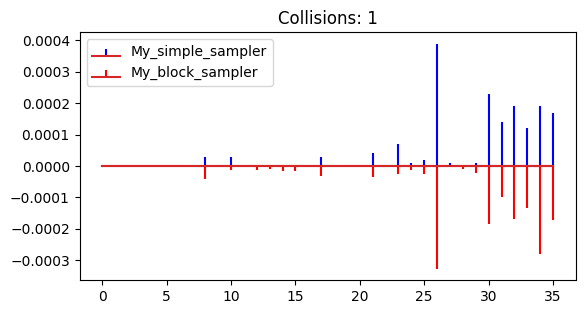

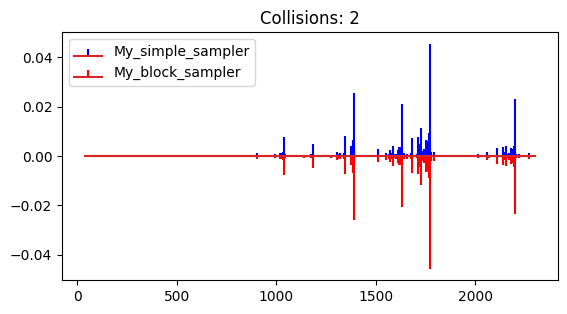

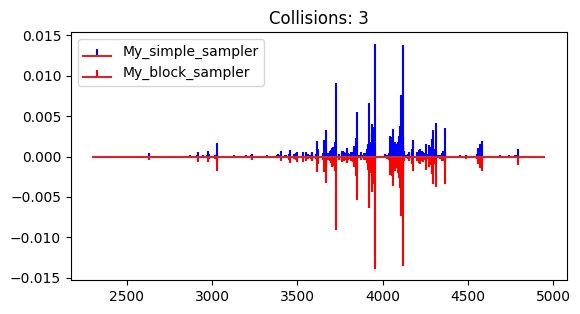

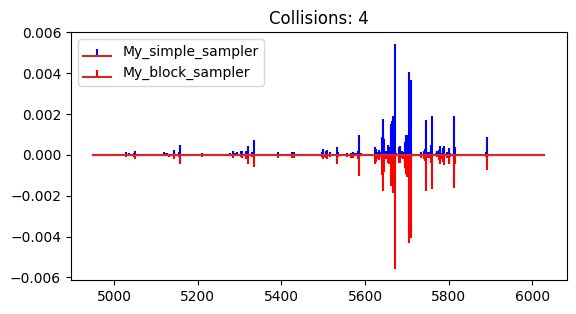

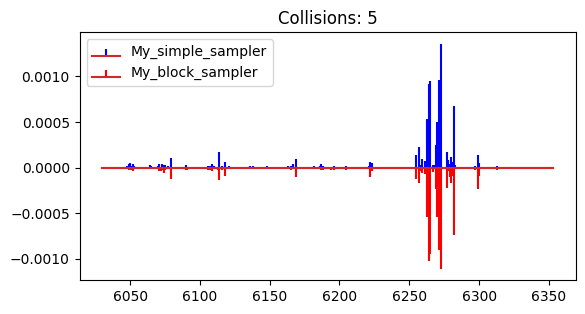

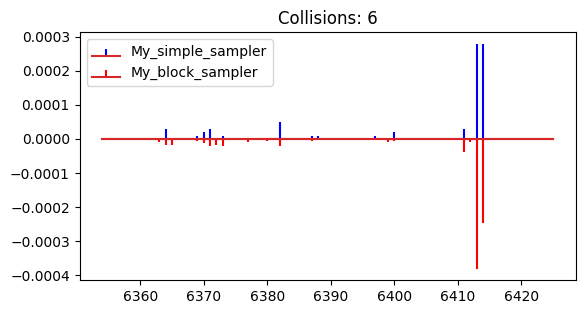

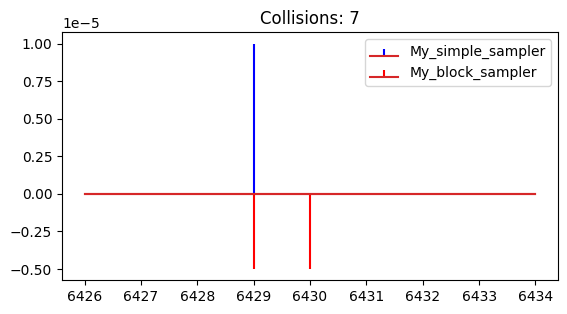

In [53]:
x_current = 0

for i in range(photons_num):
    if data_collisions[i] != []:
        fig, ax = plt.subplots()
        
        x = np.arange(x_current, x_current + len(data_collisions[i]), 1)
        x_current += len(data_collisions[i])

        y1 = [note['subject_prob'] for note in data_collisions[i]]
        y2 = [-note['base_prob'] for note in data_collisions[i]]


        ax.stem(x, y1, 'b', markerfmt='', label="My_simple_sampler")
        ax.stem(x, y2, 'r', markerfmt='', label="My_block_sampler")

        ratio = 0.5
        x_left, x_right = ax.get_xlim()
        y_low, y_high = ax.get_ylim()
        ax.set_aspect(abs((x_right-x_left)/(y_low-y_high))*ratio)
        ax.legend()
        
        plt.title("Collisions: " + str(i+1))
        
        #plt.show()

        plt.savefig('samples/analysis_results/fig' + str(i+1) + '.pdf',  format = 'pdf')

### Fidelity and TVD

In [54]:
fidelity = 0
tvd = 0

for note in data:
    fidelity += np.sqrt(note['base_prob'] * note['subject_prob'])
    tvd += abs(note['base_prob'] - note['subject_prob']) / 2
    
print('fidelity:', round(fidelity, 4))
print('tvd:', round(tvd, 4))

fidelity: 0.9915
tvd: 0.0518
